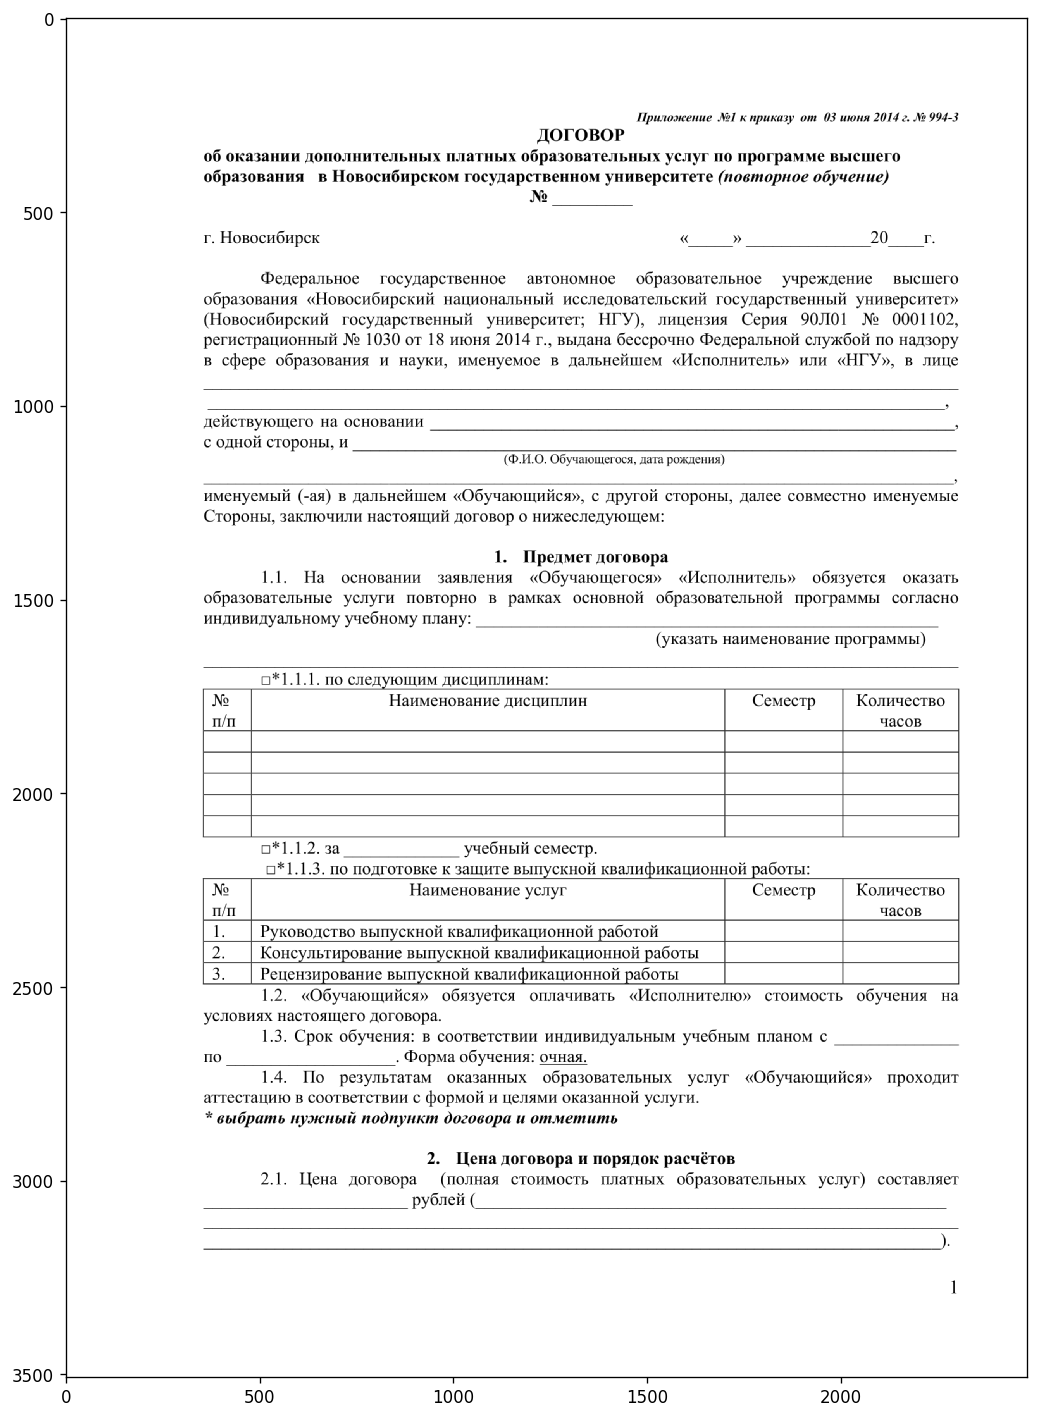

In [149]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def plt_imshow(img):
    fig = plt.figure(figsize=(17, 15), dpi=120, facecolor='w', edgecolor='k')
    plt.imshow(img, cmap='gray')

def thres(img):
    # dst = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,7, 3)
    _, dst = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
    return dst
    
def morph(img):
    kernel = np.ones((10,50), np.uint8)
    dst = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    return dst

filename = '../resources/repeat/repeat_course_1.jpg'
img = cv.imread(filename, 0)

blur = cv.GaussianBlur(img, (3,3), 3)
th = thres(blur)
plt_imshow(blur)
dst = morph(th)

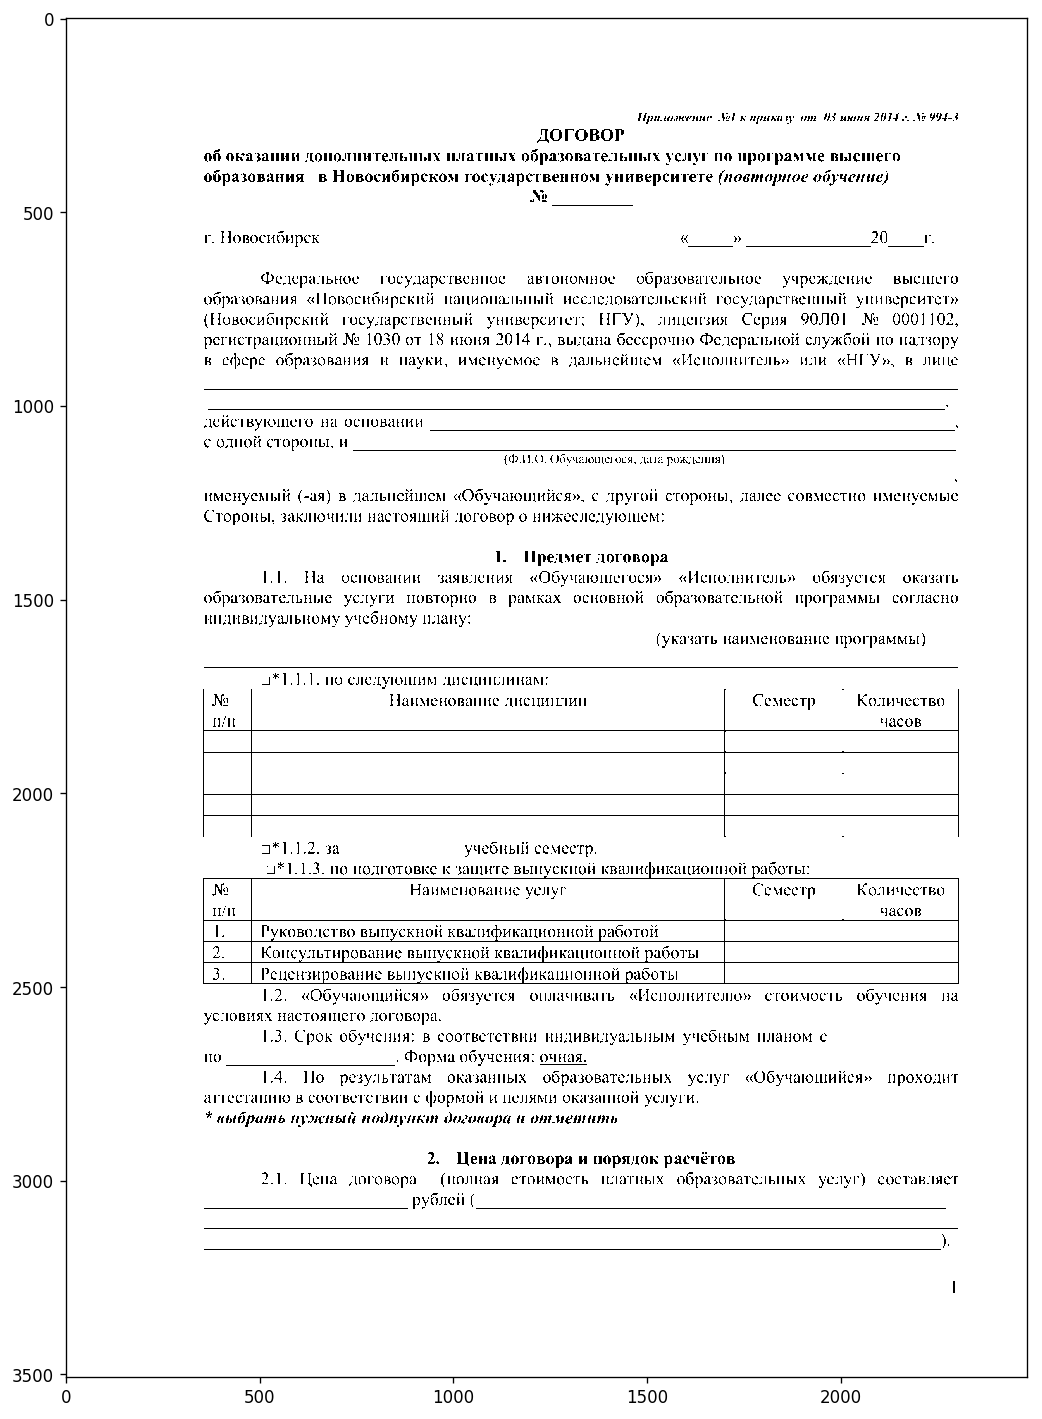

In [150]:
plt_imshow(th)

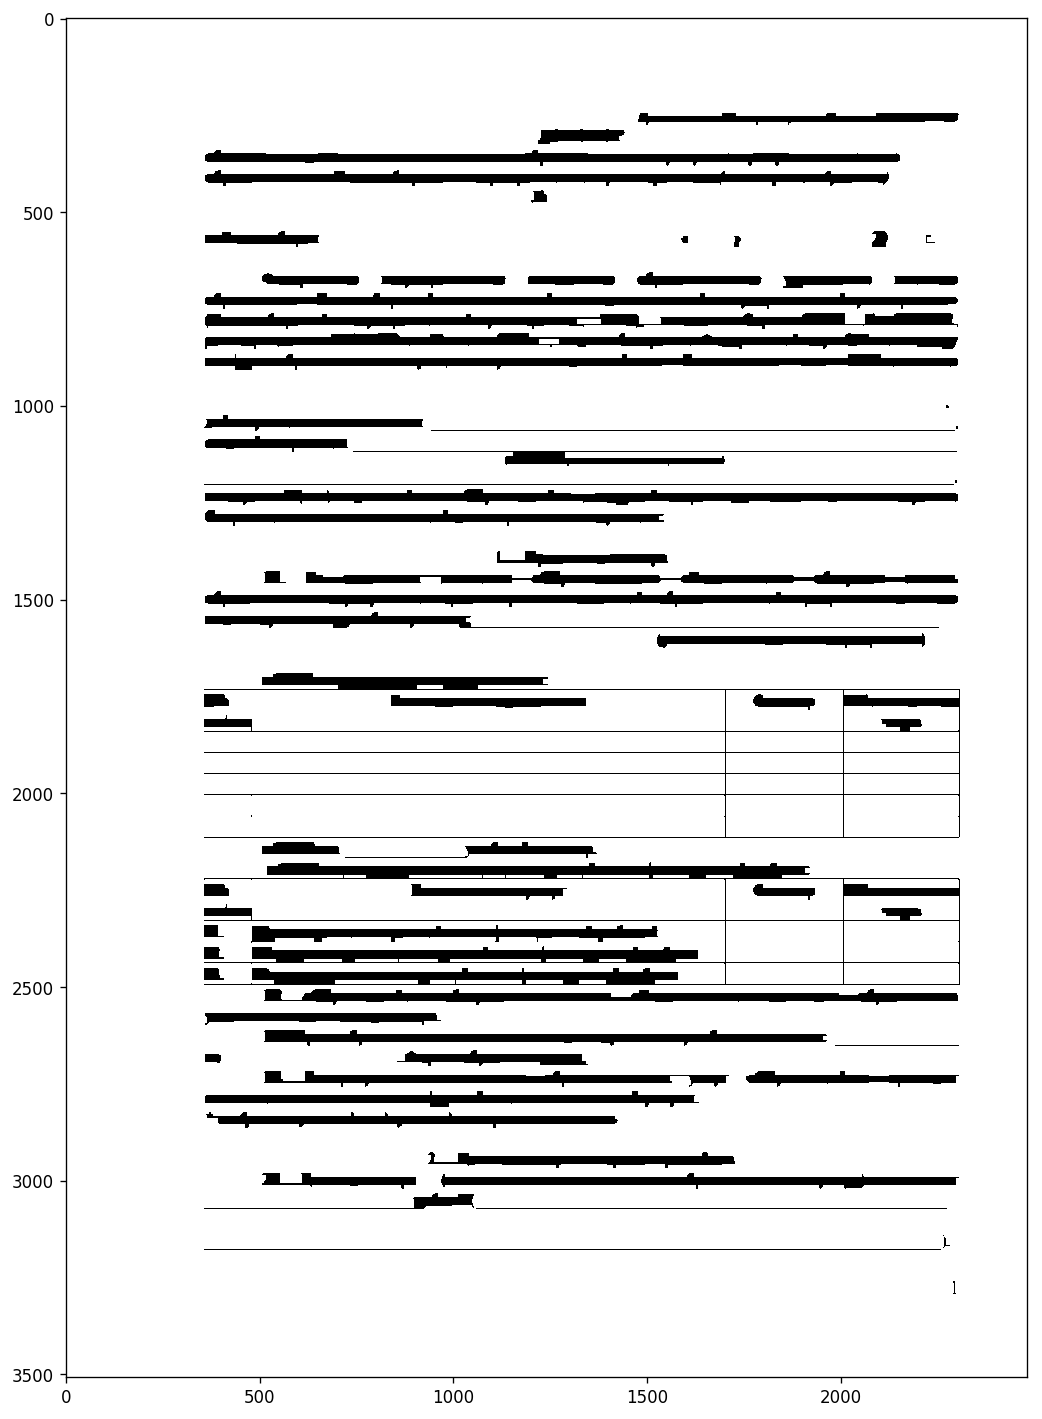

In [151]:
plt_imshow(dst)

In [158]:
_, labels = cv.connectedComponents(dst)
labels

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [159]:
dst

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)